In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

train_data = datasets.FashionMNIST(root='/home/manchik-pt7714/Documents/ML Tasks/data/temp/', train=True, transform=transform, download=False)
test_data = datasets.FashionMNIST(root='/home/manchik-pt7714/Documents/ML Tasks/data/temp/', train=False, transform=transform, download=False)

train_load = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
test_load = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False)



In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 13 * 13, 150)
        self.fc2 = nn.Linear(150, 10)
   
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 13 * 13)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = CNN()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)   


In [5]:
count = 100
train_losses = []
for epoch in range(count):
    epoch_loss = 0.0
    for images, labels in train_load:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
       
        optimizer.step()
        epoch_loss += loss.item()

   
#     scheduler.step()

    train_losses.append(epoch_loss / len(train_load))
    print(f"Epoch {epoch + 1}/{count}, Loss: {train_losses[-1]:.4f}")


Epoch 1/100, Loss: 0.6312
Epoch 2/100, Loss: 0.3892
Epoch 3/100, Loss: 0.3445
Epoch 4/100, Loss: 0.3175
Epoch 5/100, Loss: 0.2996
Epoch 6/100, Loss: 0.2856
Epoch 7/100, Loss: 0.2722
Epoch 8/100, Loss: 0.2629
Epoch 9/100, Loss: 0.2523
Epoch 10/100, Loss: 0.2447
Epoch 11/100, Loss: 0.2361
Epoch 12/100, Loss: 0.2293
Epoch 13/100, Loss: 0.2223
Epoch 14/100, Loss: 0.2149
Epoch 15/100, Loss: 0.2100
Epoch 16/100, Loss: 0.2032
Epoch 17/100, Loss: 0.1975
Epoch 18/100, Loss: 0.1911
Epoch 19/100, Loss: 0.1871
Epoch 20/100, Loss: 0.1817
Epoch 21/100, Loss: 0.1777
Epoch 22/100, Loss: 0.1714
Epoch 23/100, Loss: 0.1684
Epoch 24/100, Loss: 0.1631
Epoch 25/100, Loss: 0.1606
Epoch 26/100, Loss: 0.1542
Epoch 27/100, Loss: 0.1522
Epoch 28/100, Loss: 0.1482
Epoch 29/100, Loss: 0.1426
Epoch 30/100, Loss: 0.1401
Epoch 31/100, Loss: 0.1364
Epoch 32/100, Loss: 0.1331
Epoch 33/100, Loss: 0.1300
Epoch 34/100, Loss: 0.1265
Epoch 35/100, Loss: 0.1224
Epoch 36/100, Loss: 0.1202
Epoch 37/100, Loss: 0.1160
Epoch 38/1

In [6]:
def evaluate_accuracy(loader, model):
    model.eval()  
    correct = 0
    total = 0
    
    with torch.no_grad():  
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    accuracy = 100 * correct / total
    return accuracy


test_accuracy = evaluate_accuracy(test_load, model)
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 91.60%


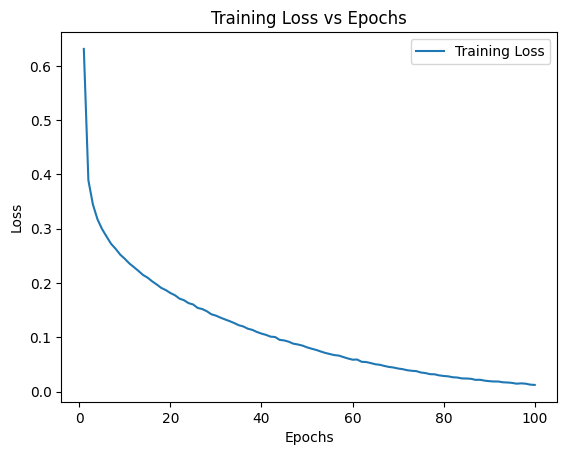

In [7]:
plt.plot(range(1, count+1),train_losses,label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

In [5]:
count = 100
train_losses = []
val_losses = []
for epoch in range(count):
    model.train()
    epoch_train_loss = 0.0
    for images,labels in train_load:
        outputs = model(images)
        loss = criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
        
    train_losses.append(epoch_train_loss/len(train_load))
    
    model.eval()
    epoch_val_loss=0.0
    for images,label in test_load:
        output = model(images)
        loss = criterion(output,labels)
        epoch_val_loss += loss.item()
    val_losses.append(epoch_val_loss/len(test_load))
        
    print(f"Epoch:{epoch+1}/{count},train_loss:{train_losses[-1]:.4f},validation loss:{val_losses[-1]:.4f}")

Epoch:1/100,train_loss:0.6467,validation loss:6.7000
Epoch:2/100,train_loss:0.3963,validation loss:7.5702
Epoch:3/100,train_loss:0.3501,validation loss:7.9730
Epoch:4/100,train_loss:0.3213,validation loss:8.6646
Epoch:5/100,train_loss:0.3025,validation loss:8.7132
Epoch:6/100,train_loss:0.2887,validation loss:9.0982
Epoch:7/100,train_loss:0.2770,validation loss:9.2771
Epoch:8/100,train_loss:0.2651,validation loss:9.2865


KeyboardInterrupt: 